In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import Normalize 
import pandas as pd
import glob
import os
import re
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
import csv
import math
import copy
from scipy.optimize import curve_fit
import scipy.stats as st
import sys

True
['#Time(sec.msec)' '#DCI Value(A)' '#delta_t(sec.msec)' '#delta_q(C)'
 '#delta_q_sum(C)' '#Q(C)']
3.307702674562491e-05
True
['#Time(sec.msec)' '#DCI Value(A)' '#delta_t(sec.msec)' '#delta_q(C)'
 '#delta_q_sum(C)' '#Q(C)']
4.853318353883926e-05
True
['#Time(sec.msec)' '#DCI Value(A)' '#delta_t(sec.msec)' '#delta_q(C)'
 '#delta_q_sum(C)' '#Q(C)']
6.737226212855973e-05
True
['#Time(sec.msec)' '#DCI Value(A)' '#delta_t(sec.msec)' '#delta_q(C)'
 '#delta_q_sum(C)' '#Q(C)']
8.585242964711635e-06


/tmp/ipykernel_412374/3896981354.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  dIdt=[(dci[j+1]-dci[j-1])/(time[j+1]-time[j-1]) for j in range(1,len(time)-1)]


True
['#Time(sec.msec)' '#DCI Value(A)' '#delta_t(sec.msec)' '#delta_q(C)'
 '#delta_q_sum(C)' '#Q(C)']
6.723461822710875e-05
flag: 3


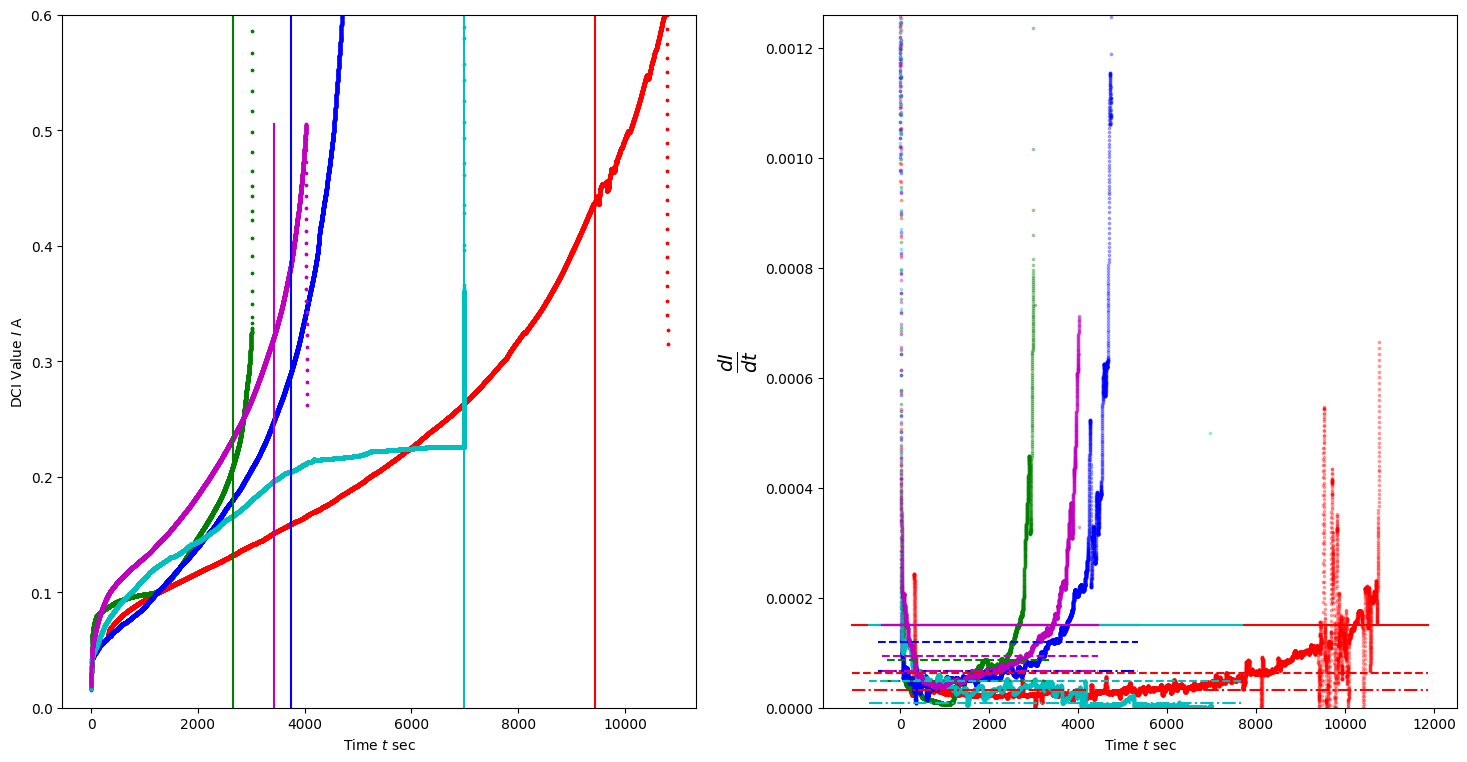

In [7]:
#データ読み込み#
data1="/mnt/d/master_thesis_data/experment_data/movie_data/movie_data/data_for_analisis/NOTWEEN/20240630_2M_NOTWEEN_0.00mM_5.99mPas_76.4mN_0001/20240630_2M_NOTWEEN_0.00mM_5.99mPas_76.4mN_0001.xlsm"
data2="/mnt/d/master_thesis_data/experment_data/movie_data/movie_data/data_for_analisis/TWEEN20/20240718_2M_TWEEN20_0.001mM_5.65mPas_69.9mN_0001/20240718_2M_TWEEN20_0.001mM_5.65mPas_69.9mN_0001.xlsm"
data3="/mnt/d/master_thesis_data/experment_data/movie_data/movie_data/data_for_analisis/TWEEN20/20240716_2M_TWEEN20_0.005mM_5.92mPas_58.7mN_0001/20240716_2M_TWEEN20_0.005mM_5.92mPas_58.7mN_0001.xlsm"
data4="/mnt/d/master_thesis_data/experment_data/movie_data/movie_data/data_for_analisis/TWEEN20/20240715_2M_TWEEN20_0.01mM_5.88mPas_53.6mN_0002/20240715_2M_TWEEN20_0.01mM_5.88mPas_53.6mN_0002.xlsm"
data5="/mnt/d/master_thesis_data/experment_data/movie_data/movie_data/data_for_analisis/TWEEN20/20240704_2M_TWEEN20_0.04mM_6.23mPas_40.9mN_0001/20240704_2M_TWEEN20_0.04mM_6.23mPas_40.9mN_0001.xlsm"

flag=3
data_list=[data1,data2,data3,data4,data5]
color_list=["r","g","b","c","m"]
fig,ax=plt.subplots(1,2,figsize=(18,9))

for data in data_list:
    print(os.path.exists(data))
    df=pd.read_excel(data,engine="openpyxl")
    print(df.columns.values)
    v=np.ones(50)/50.0 #平滑化のためのフィルタ
    time=df["#Time(sec.msec)"]-df["#Time(sec.msec)"][0]
    dci=df["#DCI Value(A)"]
    dci=np.convolve(dci,v,mode="same")
    dIdt=[(dci[j+1]-dci[j-1])/(time[j+1]-time[j-1]) for j in range(1,len(time)-1)]
    dIdt=np.convolve(dIdt,v,mode="same")
    time_dIdt = [time[j] for j in range(1,len(time)-1)]
    dIdt_ave=np.mean(dIdt[int(len(dIdt)*0.3):int(len(dIdt)*0.7)])
    didt_local_max=max(dIdt[int(len(dIdt)*0.3):int(len(dIdt)*0.7)])
    print(dIdt_ave)
    x_fit = np.linspace(-max(time)*0.1,max(time)*1.1,100)
    y_ave = np.ones(100)*dIdt_ave
    y_loc_max = np.ones(100)*didt_local_max
    y_const = np.ones(100)*0.00015
    ax[1].plot(x_fit, y_loc_max,"--",color=color_list[data_list.index(data)])
    ax[1].plot(x_fit, y_ave,"-.",color=color_list[data_list.index(data)])
    ax[1].plot(x_fit, y_const,color=color_list[data_list.index(data)])


    #閾値を超える時間を求める
    if flag==0:
        for i in range(int(len(dIdt)*0.7),int(len(dIdt)*1.0)):
            if dIdt[i]>dIdt_ave:
                index=i
                break
        x_later_thresh=np.ones(100)*time[index]
        y_later_thresh = np.linspace(0,max(dci),100)
        ax[0].plot(x_later_thresh, y_later_thresh,"--",color=color_list[data_list.index(data)])
        
    elif flag==1:
        for i in range(int(len(dIdt)*0.7),int(len(dIdt)*1.0)):
            if dIdt[i]>didt_local_max:
                index=i
                break
        x_later_thresh=np.ones(100)*time[index]
        y_later_thresh = np.linspace(0,max(dci),100)
        ax[0].plot(x_later_thresh, y_later_thresh,"-.",color=color_list[data_list.index(data)])

    elif flag==2:
        for i in range(int(len(dIdt)*0.7),int(len(dIdt)*1.0)):
            if dIdt[i]>dIdt_ave:
                index=i
                break
        tmp_index=index
        x_later_thresh=np.ones(100)*time[index]
        y_later_thresh = np.linspace(0,max(dci),100)
        ax[0].plot(x_later_thresh, y_later_thresh,"-.",color=color_list[data_list.index(data)])
        for i in range(int(len(dIdt)*0.7),int(len(dIdt)*1.0)):
            if dIdt[i]>didt_local_max:
                index=i
                break
        print(tmp_index,index)
        x_later_thresh=np.ones(100)*time[index]
        y_later_thresh = np.linspace(0,max(dci),100)
        ax[0].plot(x_later_thresh, y_later_thresh,"--",color=color_list[data_list.index(data)])
    elif flag==3:
        for i in range(int(len(dIdt)*0.5),int(len(dIdt)*1.0)):
            if dIdt[i]>y_const[0]:
                index=i
                break
        x_later_thresh=np.ones(100)*time[index]
        y_later_thresh = np.linspace(0,max(dci),100)
        ax[0].plot(x_later_thresh, y_later_thresh,color=color_list[data_list.index(data)])
    else:
        print("flag error")
        sys.exit()
    
    ax[0].scatter(time,dci,label="DCI Value A",s=3,color=color_list[data_list.index(data)])
    ax[0].set_ylim(0,0.6)

    ax[1].scatter(time_dIdt[0:int(len(time_dIdt)*1.0)],dIdt[0:int(len(time_dIdt)*1.0)],label=r"\frac{dI}{dt}",s=3,alpha=0.3,color=color_list[data_list.index(data)])

ax[0].set_xlabel("Time" + r" $t$ "+ "sec")
ax[0].set_ylabel("DCI Value"+r" $I$ " "A")

ax[1].set_xlabel("Time" + r" $t$ "+ "sec")
ax[1].set_ylabel(r"$\frac{dI}{dt}$",fontsize=20)
ax[1].set_ylim(0,dIdt[0]*1.1)

print("flag:",flag)
plt.show()

# dci_v_pos=[dci_v[i] for i in range(len(dci_v)) if dci_v[i]>0]
# time_v=[time_v[i] for i in range(len(time_v)) if dci_v[i]>0]
# print(v_dci_pos[0])

#関数フィット(電流)
# # param_init=[max(dci)/2,1,max(time)]
# param_bounds=([0,0,2000],[max(dci),np.infty,max(time)*1.1])
# params, covariance = curve_fit(tanh,time[2000:int(len(time))],dci[2000:int(len(dci))],bounds=param_bounds)
# param_init=[max(dci)/2,1,max(time)]

# # param_bounds=([1,max(time)*0.8,0],[np.infty,max(time)*1.1,max(dci)])
# params, covariance = curve_fit(inv_prop_log,time[2000:int(len(time))],np.log10(dci[2000:int(len(dci))]))
# print(params)
# x_fit = np.linspace(-max(time)*0.1,max(time)*1.1,100)
# y_fit = inv_prop(x_fit, *params)
# ax[0].plot(x_fit, y_fit,color="r")

# ax[0].set_ylim(0,max(dci)*1.1)
# ax[0].set_xscale("log")
# ax[0].set_yscale("log")

# #関数フィット（電流の時間変化）
# param_init=[max(dci_v_pos)/2,1,max(time_v)]
# param_bounds=([0,0,2000],[max(dci),np.infty,max(time)*1.1])
# params, covariance = curve_fit(tanh,time_v[600:int(len(time_v)*0.9)],dci_v_pos[600:int(len(dci_v_pos)*0.9)],p0=param_init,bounds=param_bounds)
# print(params)
# x_fit = np.linspace(-max(time_v)*0.1,max(time_v),100)
# y_fit = tanh(x_fit, *params)
# ax[1].plot(x_fit, y_fit,color="r")

In [ ]:
# coding: utf-8
from tqdm import tqdm
import time

for i in tqdm(range(123),desc="Test"):
    time.sleep(0.1)


Progress rate: 100%|██████████| 100/100 [00:22<00:00,  4.36it/s]
